# Feedback for tutors

In [1]:
from github2pandas.utility import Utility
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import os
import sys
sys.path.append('../')
from src.DataHandling import DataHandling
from src.Utilities import getrepofolder, getTeamName
%load_ext autoreload
%autoreload 2

In [2]:
project_folder_name = "../data/"
project_parameter_file = "parameter.yml"
dataHandler = DataHandling(project_folder_name, project_parameter_file)

Loading parameter file ... ../data/parameter.yml


In [3]:
print("Summarizing the following list of repositories") 
for entry in list(dataHandler.repos):
    print("'" + entry + "'")
print("{} repos found!".format(len(dataHandler.repos)))

Summarizing the following list of repositories
'Softwareentwicklung_Aufgabe3_SoSe2021_MB-CaMo'
'Softwareentwicklung_Aufgabe3_SoSe2021_MB-HeOe'
'Softwareentwicklung_Aufgabe3_SoSe2021_MB-Jado'
'Softwareentwicklung_Aufgabe3_SoSe2021_MB-Jury'
'Softwareentwicklung_Aufgabe3_SoSe2021_MB-LoTe'
'Softwareentwicklung_Aufgabe3_SoSe2021_MB-Ma-Vi'
'Softwareentwicklung_Aufgabe3_SoSe2021_MB-RoMa'
'Softwareentwicklung_Aufgabe3_SoSe2021_MB-Sola'
8 repos found!


In [4]:
anonym_pdCommits = dataHandler.unpickle_From_Preproc_Data_Folder("anonym_pdCommits.p")
anonym_pdReleases = dataHandler.unpickle_From_Preproc_Data_Folder("anonym_pdReleases.p")
anonym_pdEdits = dataHandler.unpickle_From_Preproc_Data_Folder("anonym_pdEdits.p")
anonym_pdIssues = dataHandler.unpickle_From_Preproc_Data_Folder("anonym_pdIssues.p")
anonym_pdBranches = dataHandler.unpickle_From_Preproc_Data_Folder("anonym_pdBranches.p")
anonym_pdPullRequests = dataHandler.unpickle_From_Preproc_Data_Folder("anonym_pdPullRequests.p")
teams_dict = dataHandler.unpickle_From_Preproc_Data_Folder("teams_dict.p")

## Working times

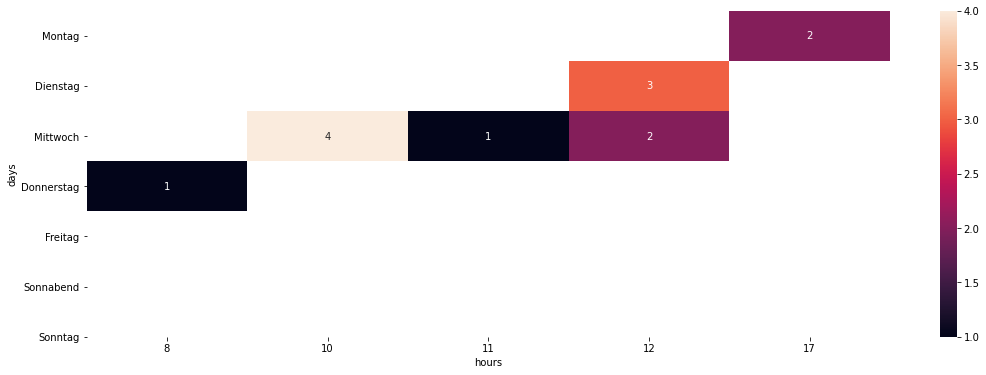

In [5]:
anonym_pdCommits['days'] = anonym_pdCommits.commited_at.dt.dayofweek
anonym_pdCommits['hours'] = anonym_pdCommits.commited_at.dt.hour
fig, ax = plt.subplots(figsize=(18,6))
y_axis_labels = ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Sonnabend', 'Sonntag']

g = sns.heatmap(anonym_pdCommits[anonym_pdCommits.commiter_role != 'github']\
                                             .groupby(['days', 'hours'])['commited_at']\
                                             .count()\
                                             .unstack(), 
            annot=True, yticklabels=y_axis_labels, ax=ax)

plt.show()

## Working activities

In [6]:
results = pd.DataFrame()
inv_teams_dict = {teams_dict[k] : k for k in teams_dict}

In [7]:
results['Team'] = ""
results['Commits'] = 0
results['Branches'] = 0
results['Issues'] = 0
results['PullRequests'] = 0
results['Releases'] = 0

for team_id in range(len(teams_dict)):
    results.loc[team_id, 'Team'] = inv_teams_dict[team_id]
    results.loc[team_id, 'Commits'] = anonym_pdCommits[anonym_pdCommits.teamKey == team_id].commit_sha.count()
    results.loc[team_id, 'Branches'] = anonym_pdBranches[anonym_pdBranches.teamKey == team_id].branch_names.count()
    results.loc[team_id, 'Issues'] = anonym_pdIssues[anonym_pdIssues.teamKey == team_id].task.count()
    results.loc[team_id, 'PullRequests'] = anonym_pdPullRequests[anonym_pdPullRequests.teamKey == team_id].id.count()
    results.loc[team_id, 'Releases'] = anonym_pdReleases[anonym_pdReleases.teamKey == team_id].team.count()

In [8]:
print(results.to_markdown())

|    | Team   |   Commits |   Branches |   Issues |   PullRequests |   Releases |
|---:|:-------|----------:|-----------:|---------:|---------------:|-----------:|
|  0 | camo   |         4 |          1 |        0 |              0 |          0 |
|  1 | heoe   |         1 |          1 |        0 |              0 |          0 |
|  2 | jado   |         3 |          1 |        0 |              0 |          0 |
|  3 | jury   |         1 |          1 |        0 |              0 |          0 |
|  4 | lote   |         8 |          2 |        0 |              1 |          0 |
|  5 | mavi   |         1 |          1 |        0 |              0 |          0 |
|  6 | roma   |         2 |          1 |        0 |              0 |          0 |
|  7 | sola   |         1 |          1 |        0 |              0 |          0 |
